# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [2]:
genome_ids = ['HG03928', 'HG03805', 'HG03916', 'HG03814', 'HG04158', 'HG03931', 'HG03607', 'HG04153', 'HG03800', 'HG03910', 'HG03802', 'HG03589', 'HG03009', 'HG03595', 'HG04188', 'HG03941', 'HG03598', 'HG03907', 'HG04176', 'HG03919', 'HG04177', 'HG03826', 'HG03603', 'HG04171', 'HG03913', 'HG03817', 'HG04186', 'HG04155', 'HG03803', 'HG03812', 'HG04140', 'HG03600', 'HG03920', 'HG03917', 'HG03937', 'HG03911', 'HG04161', 'HG03925', 'HG03793', 'HG04173', 'HG04185', 'HG03611', 'HG03830', 'HG04144', 'HG03821', 'HG03908', 'HG03824', 'HG03012', 'HG03616', 'HG04156', 'HG03922', 'HG03914', 'HG03796', 'HG03594', 'HG03823', 'HG03809', 'HG04131', 'HG03006', 'HG03902', 'HG04152', 'HG04182', 'HG03604', 'HG04180', 'HG03940', 'HG03593', 'HG03585', 'HG03829', 'HG04159', 'HG04141', 'HG03832', 'HG03905', 'HG03833', 'HG04195', 'HG04189', 'HG03615', 'HG04164', 'HG04194', 'HG03815', 'HG04146', 'HG03934', 'HG03007', 'HG04183', 'HG03926', 'HG04162', 'HG04134', 'HG03808']

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [4]:
root_dir = join(Path.home(),"cp_als/populations")

In [5]:
infile = join(root_dir,"output/BEB/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/BEB/all.csv'

In [6]:
df = pd.read_csv(infile)

In [7]:
df = df[genome_ids + ['gene']]
df.head()

,HG03928,HG03805,HG03916,HG03814,HG04158,HG03931,HG03607,HG04153,HG03800,HG03910,...,HG03815,HG04146,HG03934,HG03007,HG04183,HG03926,HG04162,HG04134,HG03808,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP


## Computer variant count per gene and per genome

In [8]:
sdf=df.groupby(["gene"]).sum()

In [9]:
sdf.head()

,HG03928,HG03805,HG03916,HG03814,HG04158,HG03931,HG03607,HG04153,HG03800,HG03910,...,HG04194,HG03815,HG04146,HG03934,HG03007,HG04183,HG03926,HG04162,HG04134,HG03808
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,4,19,3,5,5,29,45,7,7,3,...,24,18,3,5,5,7,1,9,4,8
ANG,0,4,1,0,16,8,1,0,12,0,...,0,11,0,3,1,5,5,2,0,0
ATXN2,11,18,16,20,22,19,20,11,5,8,...,20,17,11,3,20,18,4,11,5,24
C19ORF12,7,10,19,5,7,18,8,11,11,14,...,11,11,9,11,11,15,4,11,12,4
C9ORF72,15,2,31,32,13,2,11,21,20,23,...,14,21,23,16,22,17,25,34,0,15


## Compute mean99

In [10]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [11]:
mean99.head()

,0
HG03928,16.101010
HG03805,15.595960
HG03916,13.767677
HG03814,14.707071
HG04158,14.070707


In [12]:
m99 = mean99.transpose()

In [13]:
m99

,HG03928,HG03805,HG03916,HG03814,HG04158,HG03931,HG03607,HG04153,HG03800,HG03910,...,HG04194,HG03815,HG04146,HG03934,HG03007,HG04183,HG03926,HG04162,HG04134,HG03808
0,16.10101,15.59596,13.767677,14.707071,14.070707,14.444444,14.393939,9.919192,13.707071,13.282828,...,12.555556,14.181818,13.070707,12.808081,12.545455,12.717172,16.010101,8.777778,11.747475,10.393939


## Name the row "mean99" to append to the dataframe 

In [14]:
m99.index=["mean99"]

In [15]:
m99.head()

,HG03928,HG03805,HG03916,HG03814,HG04158,HG03931,HG03607,HG04153,HG03800,HG03910,...,HG04194,HG03815,HG04146,HG03934,HG03007,HG04183,HG03926,HG04162,HG04134,HG03808
mean99,16.10101,15.59596,13.767677,14.707071,14.070707,14.444444,14.393939,9.919192,13.707071,13.282828,...,12.555556,14.181818,13.070707,12.808081,12.545455,12.717172,16.010101,8.777778,11.747475,10.393939


## Compute statistics per genome, across all genes

In [16]:
genome_stats= sdf.describe()

In [17]:
genome_stats.head()

,HG03928,HG03805,HG03916,HG03814,HG04158,HG03931,HG03607,HG04153,HG03800,HG03910,...,HG04194,HG03815,HG04146,HG03934,HG03007,HG04183,HG03926,HG04162,HG04134,HG03808
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,44.277778,42.888889,37.861111,40.444444,38.694444,39.722222,39.583333,27.277778,37.694444,36.527778,...,34.527778,39.000000,35.944444,35.222222,34.500000,34.972222,44.027778,24.138889,32.305556,28.583333
std,145.855038,191.035491,149.510659,129.407539,178.439717,154.494126,111.187711,94.290315,171.407921,144.307110,...,133.948068,139.360376,133.408062,138.820565,123.962552,146.030620,156.722227,84.501277,126.869746,74.315303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,1.000000,1.000000,2.000000,2.000000,1.750000,2.750000,1.000000,1.750000,2.750000,...,1.750000,2.500000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000


### Adding new rows for genomes to show variant statistics

In [18]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [19]:
genome_stats_df

,HG03928,HG03805,HG03916,HG03814,HG04158,HG03931,HG03607,HG04153,HG03800,HG03910,...,HG04194,HG03815,HG04146,HG03934,HG03007,HG04183,HG03926,HG04162,HG04134,HG03808
ALS2,4.000000,19.000000,3.000000,5.000000,5.000000,29.000000,45.000000,7.000000,7.000000,3.000000,...,24.000000,18.000000,3.000000,5.000000,5.000000,7.000000,1.000000,9.000000,4.000000,8.000000
ANG,0.000000,4.000000,1.000000,0.000000,16.000000,8.000000,1.000000,0.000000,12.000000,0.000000,...,0.000000,11.000000,0.000000,3.000000,1.000000,5.000000,5.000000,2.000000,0.000000,0.000000
ATXN2,11.000000,18.000000,16.000000,20.000000,22.000000,19.000000,20.000000,11.000000,5.000000,8.000000,...,20.000000,17.000000,11.000000,3.000000,20.000000,18.000000,4.000000,11.000000,5.000000,24.000000
C19ORF12,7.000000,10.000000,19.000000,5.000000,7.000000,18.000000,8.000000,11.000000,11.000000,14.000000,...,11.000000,11.000000,9.000000,11.000000,11.000000,15.000000,4.000000,11.000000,12.000000,4.000000
C9ORF72,15.000000,2.000000,31.000000,32.000000,13.000000,2.000000,11.000000,21.000000,20.000000,23.000000,...,14.000000,21.000000,23.000000,16.000000,22.000000,17.000000,25.000000,34.000000,0.000000,15.000000
CHCHD10,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,2.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
CHMP2B,9.000000,6.000000,12.000000,0.000000,2.000000,9.000000,11.000000,13.000000,5.000000,5.000000,...,11.000000,5.000000,10.000000,3.000000,12.000000,15.000000,12.000000,9.000000,3.000000,9.000000
CHRNA3,23.000000,23.000000,20.000000,20.000000,14.000000,17.000000,17.000000,6.000000,19.000000,17.000000,...,23.000000,5.000000,17.000000,18.000000,24.000000,5.000000,19.000000,5.000000,6.000000,24.000000
CREST,88.000000,2.000000,22.000000,4.000000,5.000000,6.000000,127.000000,7.000000,1.000000,87.000000,...,2.000000,86.000000,87.000000,86.000000,91.000000,89.000000,6.000000,89.000000,2.000000,85.000000
DAO,2.000000,2.000000,4.000000,3.000000,1.000000,0.000000,2.000000,3.000000,1.000000,6.000000,...,0.000000,10.000000,7.000000,3.000000,0.000000,1.000000,2.000000,4.000000,14.000000,2.000000


### Compute per gene stats

In [20]:
gene_df = sdf.transpose().describe()

In [21]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,86.0,11.081395,9.974338,1.0,4.00,7.0,19.00,45.0
ANG,86.0,3.837209,4.811409,0.0,0.00,1.0,6.00,19.0
ATXN2,86.0,16.069767,6.011344,3.0,11.00,17.0,20.00,29.0
C19ORF12,86.0,9.569767,3.983911,2.0,7.00,10.0,11.00,19.0
C9ORF72,86.0,18.139535,9.433561,0.0,11.25,16.5,24.00,36.0
CHCHD10,86.0,0.965116,0.710388,0.0,1.00,1.0,1.00,3.0
CHMP2B,86.0,8.081395,4.406453,0.0,5.00,9.0,11.00,19.0
CHRNA3,86.0,16.441860,7.927027,1.0,7.25,18.0,22.00,33.0
CREST,86.0,41.441860,41.885728,0.0,4.00,7.5,87.00,127.0


In [22]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [23]:
rdf.head()

,HG03928,HG03805,HG03916,HG03814,HG04158,HG03931,HG03607,HG04153,HG03800,HG03910,...,HG04134,HG03808,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,4,19,3,5,5,29,45,7,7,3,...,4,8,86.0,11.081395,9.974338,1.0,4.00,7.0,19.0,45.0
ANG,0,4,1,0,16,8,1,0,12,0,...,0,0,86.0,3.837209,4.811409,0.0,0.00,1.0,6.0,19.0
ATXN2,11,18,16,20,22,19,20,11,5,8,...,5,24,86.0,16.069767,6.011344,3.0,11.00,17.0,20.0,29.0
C19ORF12,7,10,19,5,7,18,8,11,11,14,...,12,4,86.0,9.569767,3.983911,2.0,7.00,10.0,11.0,19.0
C9ORF72,15,2,31,32,13,2,11,21,20,23,...,0,15,86.0,18.139535,9.433561,0.0,11.25,16.5,24.0,36.0


In [24]:
rdf

,HG03928,HG03805,HG03916,HG03814,HG04158,HG03931,HG03607,HG04153,HG03800,HG03910,...,HG04134,HG03808,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,4,19,3,5,5,29,45,7,7,3,...,4,8,86.0,11.081395,9.974338,1.0,4.00,7.0,19.00,45.0
ANG,0,4,1,0,16,8,1,0,12,0,...,0,0,86.0,3.837209,4.811409,0.0,0.00,1.0,6.00,19.0
ATXN2,11,18,16,20,22,19,20,11,5,8,...,5,24,86.0,16.069767,6.011344,3.0,11.00,17.0,20.00,29.0
C19ORF12,7,10,19,5,7,18,8,11,11,14,...,12,4,86.0,9.569767,3.983911,2.0,7.00,10.0,11.00,19.0
C9ORF72,15,2,31,32,13,2,11,21,20,23,...,0,15,86.0,18.139535,9.433561,0.0,11.25,16.5,24.00,36.0
CHCHD10,1,1,0,2,1,1,2,1,0,0,...,1,1,86.0,0.965116,0.710388,0.0,1.00,1.0,1.00,3.0
CHMP2B,9,6,12,0,2,9,11,13,5,5,...,3,9,86.0,8.081395,4.406453,0.0,5.00,9.0,11.00,19.0
CHRNA3,23,23,20,20,14,17,17,6,19,17,...,6,24,86.0,16.441860,7.927027,1.0,7.25,18.0,22.00,33.0
CREST,88,2,22,4,5,6,127,7,1,87,...,2,85,86.0,41.441860,41.885728,0.0,4.00,7.5,87.00,127.0


# Plot bar chart of total variant counts per gene


In [25]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [26]:
gdf=df.groupby(["gene"]).count()

In [27]:
gdf

,POS
gene,
ALS2,214
ANG,51
ATXN2,305
C19ORF12,70
C9ORF72,113
CHCHD10,7
CHMP2B,85
CHRNA3,115
CREST,264


In [28]:
gdf.reset_index(inplace=True)

In [29]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [30]:
gdf

,gene,variant_count
0,ERBB4,5621
1,NEK1,836
2,FIG4,427
3,SETX,360
4,SPG11,310
5,ATXN2,305
6,CREST,264
7,ELP3,259
8,VAPB,242
9,ALS2,214


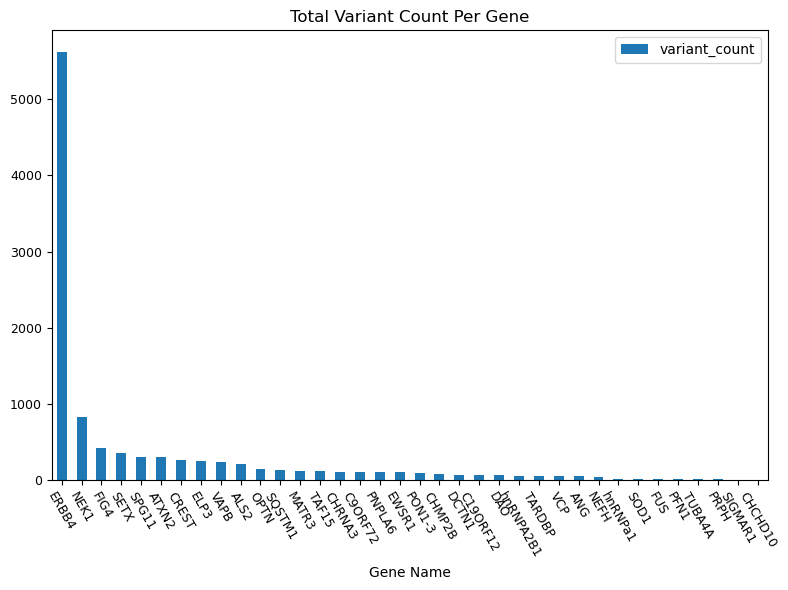

In [31]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [32]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SETX', 'SPG11']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [33]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [34]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [35]:
hdf.reset_index(inplace=True)

In [36]:
hdf.head()

,index,count
0,HG03928,1594
1,HG03805,1544
2,HG03916,1363
3,HG03814,1456
4,HG04158,1393


In [37]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(1335.9883720930231), 210.62324848975612)

## Find top and bottom genomes using mean & STD

In [38]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [39]:
len(top_genomes)

15

In [40]:
len(bottom_genomes)

13

In [41]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [42]:
sdf.head()

,HG03928,HG03805,HG03916,HG03814,HG04158,HG03931,HG03607,HG04153,HG03800,HG03910,...,HG04194,HG03815,HG04146,HG03934,HG03007,HG04183,HG03926,HG04162,HG04134,HG03808
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,4,19,3,5,5,29,45,7,7,3,...,24,18,3,5,5,7,1,9,4,8
ANG,0,4,1,0,16,8,1,0,12,0,...,0,11,0,3,1,5,5,2,0,0
ATXN2,11,18,16,20,22,19,20,11,5,8,...,20,17,11,3,20,18,4,11,5,24
C19ORF12,7,10,19,5,7,18,8,11,11,14,...,11,11,9,11,11,15,4,11,12,4
C9ORF72,15,2,31,32,13,2,11,21,20,23,...,14,21,23,16,22,17,25,34,0,15


In [43]:
tgdf= sdf.loc[top_genes]

In [44]:
tgdf_top_genomes = tgdf[top_genomes]

In [45]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [46]:
tgdf_top_genomes.head()

,HG03928,HG03009,HG04188,HG03826,HG04171,HG03817,HG04185,HG04144,HG03616,HG03796,HG03823,HG03940,HG03829,HG03833,HG03926
gene,,,,,,,,,,,,,,,
ERBB4,869,1106,945,1252,1013,1096,1150,1174,891,1008,834,1151,1148,1060,927
NEK1,189,182,204,224,205,41,64,48,312,235,191,11,192,189,231
FIG4,51,23,54,35,37,79,71,16,66,71,36,73,44,42,39
SETX,67,61,30,62,84,26,47,5,90,27,25,7,50,59,52
SPG11,49,11,125,5,62,9,8,55,97,8,58,93,2,2,93


In [47]:
tgdf_bot_genomes.head()

,HG04153,HG03603,HG04155,HG03937,HG03914,HG03902,HG04182,HG04180,HG03593,HG03832,HG03615,HG04162,HG03808
gene,,,,,,,,,,,,,
ERBB4,572,583,575,760,293,603,571,669,484,622,449,508,404
NEK1,48,44,132,43,212,38,10,44,188,44,43,5,212
FIG4,40,24,35,46,42,63,43,78,76,60,3,21,39
SETX,27,71,8,7,46,49,41,7,8,14,10,28,9
SPG11,5,52,8,3,5,8,4,5,1,6,92,7,4


## Plot stacked bar chart for top genes & top genomes

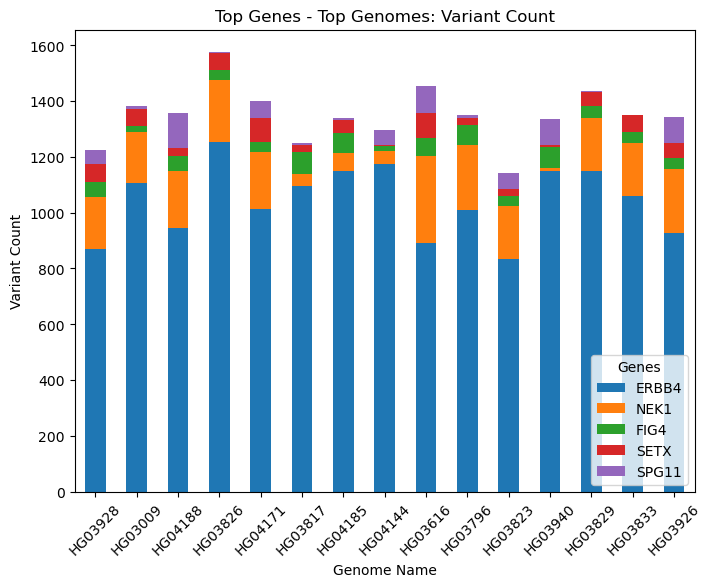

In [48]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

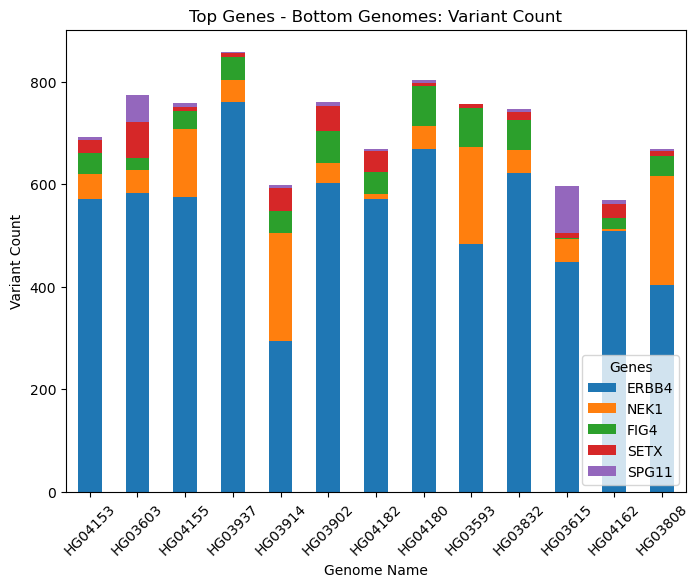

In [49]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()